# Машинное обучение

Практическое задание 1 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеки NumPy и Pandas для осуществления желаемых преобразований;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [97]:
import numpy as np

Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [98]:
def max_element(arr):
    print(np.max(np.take(arr[1:], np.where(arr[:-1]==0))))
    
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) 
if 0 not in x:
    print(None)
else:
    max_element(x)

5


Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [99]:
def nearest_value(X, v):
    print(np.argmin(np.abs(X-v)))
    
X = np.arange(0,10).reshape((2, 5))
v = 3.6
nearest_value(X, v)

4


Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [100]:
def scale(X):
    means, stds = np.mean(X, axis=0), np.std(X, axis=0)
    print((X - means)/stds)
    
X = np.random.randint(0, 50, size = (4, 4))    
scale(X)

[[ 1.38553853  0.46017899 -1.18321596 -0.02216755]
 [ 0.19292309 -0.61357199 -0.73246702  0.6871942 ]
 [-1.42061545  1.38053698  0.61977979 -1.61823151]
 [-0.15784616 -1.22714398  1.29590319  0.95320486]]


 Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [101]:
def get_stats(X):
    print('Определитель: ', np.linalg.det(X))
    print('Cлед: ', np.trace(X))
    print('Наименьший элемент: ', np.amin(X))
    print('Наибольший элемент: ', np.amax(X))
    print('Норма Фробениуса: ', np.linalg.norm(X, ord = None))
    print('Собственные числа:\n', np.linalg.eig(X))
    print('Обратная матрица:\n', np.linalg.inv(X))
    
X= 1 * np.random.randn(4, 4) + 10
get_stats(X);

Определитель:  -37.638037071105266
Cлед:  38.12970962757076
Наименьший элемент:  8.538408768382034
Наибольший элемент:  11.688762950150869
Норма Фробениуса:  39.67616064757815
Собственные числа:
 (array([39.53004321+0.j        , -0.52598523+1.56732733j,
       -0.52598523-1.56732733j, -0.34836312+0.j        ]), array([[-0.48585386+0.j        , -0.23159092-0.49605091j,
        -0.23159092+0.49605091j, -0.32012327+0.j        ],
       [-0.50474683+0.j        , -0.05694474+0.10533698j,
        -0.05694474-0.10533698j, -0.58781467+0.j        ],
       [-0.50373987+0.j        , -0.33504163+0.41277001j,
        -0.33504163-0.41277001j,  0.1757839 +0.j        ],
       [-0.50539372+0.j        ,  0.63508156+0.j        ,
         0.63508156-0.j        ,  0.72186912+0.j        ]]))
Обратная матрица:
 [[ 0.1284852  -1.21052238  1.01634115  0.09675919]
 [ 0.40474621 -2.01738874  1.03123655  0.62311176]
 [-0.50390328  1.03813215 -0.59748204  0.06835896]
 [ 0.0121433   2.17940266 -1.42387452 -0.7437

Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [102]:
array = []
for exp_num in range(100):
    X= np.random.randn(10, 10) #N(0;1)
    Y= np.random.randn(10, 10) #N(0;1)
    total =np.dot(X, Y)
    mx=np.amax(total)
    #print('Максимальный элемент: ', mx)
    array.append(mx)
    
#print (array)
print('Среднее значение: ',np.mean(array))
print('95-процентная квантиль: ',np.percentile(array, 95)) 

Среднее значение:  8.340692826688077
95-процентная квантиль:  12.121912940367025


### Pandas

![](https://metrouk2.files.wordpress.com/2015/10/panda.jpg)

#### Ответьте на вопросы о данных по авиарейсам в США за январь-апрель 2008 года.

[Данные](https://www.dropbox.com/s/dvfitn93obn0rql/2008.csv?dl=0) и их [описание](http://stat-computing.org/dataexpo/2009/the-data.html)

In [103]:
import pandas as pd
%matplotlib inline
rf = pd.read_csv('2008.csv')

Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)

In [104]:
A=0;B=0;C=0;D=0
for i in rf.CancellationCode:
    if i=='A':
        A+=1
    if i=='B':
        B+=1
    if i=='C':
        C+=1
    if i=='D':
        D+=1
        
if A>B and A>C and A>D:
    print ('A-carrier =',A)
        
else:
    if B>A and B>C and B>D:
        print ('B-weather =',B)
    else:
        if C>A and C>B and C>D:
            print ('C-NAS =',C) 
        else:
            if D>A and D>B and D>C:
                print ('D-security =',D) 
            else:
                 print(' A-carrier =',A,'\n', 'B-weather =',B,'\n', 
                       'C-NAS =',C,'\n','D-security =',D)

A-carrier = 563


 Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.

In [105]:
sam=rf.apply({'Distance':['min', 'max', 'mean', 'median']})
print('По всем самолетам:','\n',sam); 

По всем самолетам: 
            Distance
min       31.000000
max     4962.000000
mean     724.508257
median   575.000000


 Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?

In [106]:
sam=rf[(rf.Distance== int(rf.Distance.min()))][['Distance','Year','Month', 'DayofMonth', 'FlightNum']]
print (sam)
print ('\n')
sam=rf[(rf.FlightNum==64) & (rf.Distance != int(rf.Distance.min()))][['Distance','Year','Month','DayofMonth']]
print ('FlightNum=64: ','\n',sam)
print ('\n')
sam=rf[(rf.FlightNum==65) & (rf.Distance != int(rf.Distance.min()))][['Distance','Year','Month','DayofMonth']]
print ('FlightNum=65: ','\n',sam)

       Distance  Year  Month  DayofMonth  FlightNum
1116         31  2008     12          30         65
6958         31  2008     12          26         65
17349        31  2008      8          18         64
27534        31  2008      3          11         64
46082        31  2008      8           9         65
48112        31  2008      2          28         64


FlightNum=64:  
        Distance  Year  Month  DayofMonth
501         533  2008      3          20
1389        680  2008      3          13
2619       2381  2008      5          23
3869         82  2008      7           1
4025       1005  2008      6          15
4466        123  2008      6          29
6778        359  2008      7          12
7891       2381  2008      4           6
7977       1747  2008      7           9
8448        123  2008      2          10
9615        533  2008      1           4
10833       372  2008      3          31
12352      1747  2008      1          14
12980        82  2008      8           6
13

Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

In [107]:
airports = pd.read_csv("airports.csv")
print(rf.Origin.value_counts(), '\n')
print(airports[airports.iata == 'ATL'].city)

ATL    4134
ORD    3550
DFW    2793
DEN    2383
LAX    2082
       ... 
AKN       1
DLG       1
ADK       1
GST       1
BLI       1
Name: Origin, Length: 297, dtype: int64 

880    Atlanta
Name: city, dtype: object


Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

In [108]:
#print(rf[['Origin','AirTime']].groupby('Origin').mean().sort_values(('AirTime'),ascending=False), '\n')
#print(rf[['Origin','AirTime']].groupby('Origin').mean().sort_values(('AirTime'),ascending=False).max(), '\n')
print(rf[['Origin','AirTime']].groupby('Origin').mean().sort_values(('AirTime'),ascending=False).idxmax())

AirTime    SJU
dtype: object


Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).


In [109]:
za=rf[['Origin','DepDelay']].groupby(['Origin']).filter(lambda x: x['Origin'].count()>1000).sort_values(by=['DepDelay'], ascending=False)
#Наибольшее количество задержанных рейсов
print('Наибольшее количество задержанных рейсов','\n', za.head(1),'\n')
#Наибольшая доля задержанных рейсов
dol=rf[rf["DepDelay"] > 0].groupby("Origin").size()[rf.groupby("Origin").size()>1000]/rf.groupby("Origin").size()[rf.groupby("Origin").size()>1000]
print('Наибольшая доля задержанных рейсов','\n', dol.idxmax())

Наибольшее количество задержанных рейсов 
      Origin  DepDelay
3635    MCO     750.0 

Наибольшая доля задержанных рейсов 
 EWR


## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать датасет из предыдущей части задания для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.

### Подготовка данных

**12. (0.5 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [110]:
import numpy as np
import pandas as pd
rf = pd.read_csv("2008.csv")
s=rf.isnull().sum()
#rf.info()
print('Имеются ли в данных пропущенные значения: ', s.count()>0)
print('Всего пропущенных элементов в таблице "объект-признак": ',rf.isnull().sum().sum())
print('Количество объектов, имеющих хотя бы один пропуск: {}'.format(np.sum(np.any(rf, axis=1))))
#print('Количество признаков всего: ',s.count())
#print('Признаки, имеющие хотя бы одно пропущенное значение: ','\n',s)
pr_null=0
for pr in s:
    if pr > 0:
        pr_null+=1  
print('Количество признаков, имеющих хотя бы одно пропущенное значение: ',pr_null)


Имеются ли в данных пропущенные значения:  True
Всего пропущенных элементов в таблице "объект-признак":  355215
Количество объектов, имеющих хотя бы один пропуск: 70000
Количество признаков, имеющих хотя бы одно пропущенное значение:  16


Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [111]:
#rf.info()
cp=rf['DepDelay'].isnull().sum()
print('Имеются ли пропущенные значения в целевой переменной: ', cp)
ob_null=rf[(rf['DepDelay']).isnull()] 
print(ob_null)
#Исключаем CancellationCode и Cancelled, тк опоздание рейса никак не будут зависеть от отмены рейса или причин отмены
#ob_null.info()

Имеются ли пропущенные значения в целевой переменной:  1399
       Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
11     2008      3           6          4      NaN        1605      NaN   
78     2008      1          19          6      NaN         750      NaN   
103    2008      7          24          4      NaN        1230      NaN   
112    2008      2           4          1      NaN         620      NaN   
128    2008      1          21          1      NaN        1838      NaN   
...     ...    ...         ...        ...      ...         ...      ...   
69818  2008      6           9          1      NaN        1645      NaN   
69836  2008      1          25          5      NaN         938      NaN   
69884  2008     12          26          5      NaN        1935      NaN   
69918  2008      3           1          6      NaN         600      NaN   
69949  2008      1          21          1      NaN        1630      NaN   

       CRSArrTime UniqueCarrier  Flight

In [112]:
#Исключаем из выборки объекты с пропущенным значением целевой переменной и со значением целевой переменной, равным 0
rf=rf[(rf.DepDelay!=0) & (rf.DepDelay.notnull())]
print(rf)

       Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
0      2008      6          18          3   2111.0        2055   2308.0   
1      2008      6           4          3   1426.0        1410   1730.0   
2      2008      8           3          7   1143.0        1145   1501.0   
3      2008      1          23          3   1141.0        1144   1323.0   
4      2008      5           4          7    815.0         820   1243.0   
...     ...    ...         ...        ...      ...         ...      ...   
69994  2008      1          26          6    920.0         925   1110.0   
69995  2008      5          12          1   1829.0        1840   2137.0   
69996  2008      5          11          7   1149.0        1125   1336.0   
69998  2008      2          18          1   1906.0        1900   2200.0   
69999  2008     12           6          6    859.0         900    959.0   

       CRSArrTime UniqueCarrier  FlightNum  ... TaxiIn  TaxiOut  Cancelled  \
0            2300    

In [113]:
#Исключаем CancellationCode и Cancelled, тк опоздание рейса никак не будут зависеть от отмены рейса или причин отмены 
rf.drop(['CancellationCode','Cancelled'], axis = 1, inplace = True)
rf.shape

(63404, 27)

In [114]:
#выделяем целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак"
vect = rf['DepDelay']
rf.drop(['DepDelay'], axis = 1, inplace = True)

**13. (0.5 балла)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [115]:
for pr in ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']:
    rf[pr+'_Hour'] = rf[pr]//100
    rf[pr+'_Minute'] = rf[pr]%100
print(rf)

       Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
0      2008      6          18          3   2111.0        2055   2308.0   
1      2008      6           4          3   1426.0        1410   1730.0   
2      2008      8           3          7   1143.0        1145   1501.0   
3      2008      1          23          3   1141.0        1144   1323.0   
4      2008      5           4          7    815.0         820   1243.0   
...     ...    ...         ...        ...      ...         ...      ...   
69994  2008      1          26          6    920.0         925   1110.0   
69995  2008      5          12          1   1829.0        1840   2137.0   
69996  2008      5          11          7   1149.0        1125   1336.0   
69998  2008      2          18          1   1906.0        1900   2200.0   
69999  2008     12           6          6    859.0         900    959.0   

       CRSArrTime UniqueCarrier  FlightNum  ... SecurityDelay  \
0            2300            WN   

In [116]:
rf.drop(['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime'], axis = 1, inplace = True)
rf.shape

(63404, 30)

**14. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

In [117]:
#Исключаем признаки TailNum и Year
rf.drop(['TailNum','Year'], axis = 1, inplace = True)
rf.shape

(63404, 28)

In [118]:
rf.corr()

,Month,DayofMonth,DayOfWeek,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,Distance,TaxiIn,...,SecurityDelay,LateAircraftDelay,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute
Month,1.000000,-0.004838,-0.010617,0.006598,-0.014230,-0.005765,-0.012840,-0.041950,-0.006289,0.007768,...,0.008620,0.017445,-0.008803,0.002405,-0.006727,0.011477,-0.002887,-0.001491,0.002805,-0.005353
DayofMonth,-0.004838,1.000000,0.015818,0.009847,-0.008110,-0.007024,-0.007842,0.006479,-0.007196,-0.002673,...,-0.007752,0.009641,0.001605,0.006268,0.002206,-0.000784,-0.001435,-0.006125,0.000708,0.001285
DayOfWeek,-0.010617,0.015818,1.000000,-0.005878,0.010330,0.013325,0.011541,0.002943,0.014755,0.001024,...,0.005031,0.007566,0.005866,-0.000551,0.005484,-0.000623,0.005762,-0.000901,0.006235,0.000784
FlightNum,0.006598,0.009847,-0.005878,1.000000,-0.324021,-0.331409,-0.336906,0.027777,-0.350380,-0.005973,...,0.009387,-0.022415,-0.003754,-0.006509,-0.011477,-0.002824,-0.019202,0.001697,-0.031454,0.018267
ActualElapsedTime,-0.014230,-0.008110,0.010330,-0.324021,1.000000,0.979979,0.984401,0.089451,0.965089,0.154726,...,0.002250,-0.085353,-0.017290,0.000991,-0.016923,0.009981,0.033067,0.000021,0.052552,0.005242
CRSElapsedTime,-0.005765,-0.007024,0.013325,-0.331409,0.979979,1.000000,0.988293,0.010358,0.983478,0.100990,...,0.003952,-0.041558,-0.014587,0.001035,-0.011965,0.011929,0.034166,0.002003,0.058308,0.005302
AirTime,-0.012840,-0.007842,0.011541,-0.336906,0.984401,0.988293,1.000000,0.031206,0.983222,0.082090,...,0.004590,-0.060884,-0.023179,0.001006,-0.020695,0.011579,0.026744,0.000545,0.045576,0.002669
ArrDelay,-0.041950,0.006479,0.002943,0.027777,0.089451,0.010358,0.031206,1.000000,0.003952,0.117087,...,0.008990,0.509705,0.181565,-0.016460,0.119652,0.017466,0.062637,0.002412,0.115969,0.009064
Distance,-0.006289,-0.007196,0.014755,-0.350380,0.965089,0.983478,0.983222,0.003952,1.000000,0.072517,...,0.006950,-0.037445,-0.016906,-0.000497,-0.011925,0.015068,0.024635,0.002774,0.047643,0.005432
TaxiIn,0.007768,-0.002673,0.001024,-0.005973,0.154726,0.100990,0.082090,0.117087,0.072517,1.000000,...,0.000476,-0.046780,-0.046532,-0.001050,-0.052721,-0.013244,0.001059,-0.009682,-0.012198,-0.002818


In [119]:
#Исключаем признаки, оказывающуие значимое влияние на прогноз
rf.drop(['ArrDelay','CarrierDelay', 'WeatherDelay','NASDelay', 'SecurityDelay','LateAircraftDelay'], axis = 1, inplace = True)
#Исключаем признаки, сильно коррелирующие с ответами
rf.drop(['CRSElapsedTime','ActualElapsedTime','AirTime'], axis = 1, inplace = True)
rf.shape

(63404, 19)

**15. (1 балл)** Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

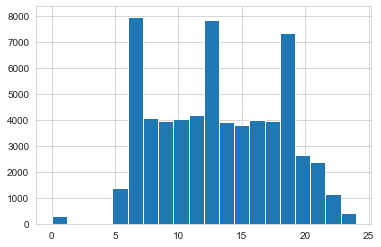

In [120]:
rf['DepTime_Hour'].hist(bins=20)

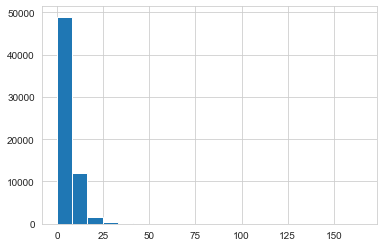

In [121]:
rf['TaxiIn'].hist(bins=20)

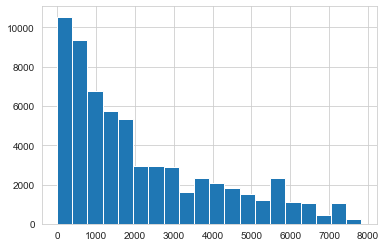

In [122]:
rf['FlightNum'].hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

Некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [123]:
from sklearn.preprocessing import StandardScaler

def transform_data(data):
    ss = StandardScaler()
    for col in data.columns:
        if data[col].dtype.name == 'object':
            data[col].fillna('nan', inplace = True)
        else:
            data[col].fillna(0, inplace = True)
            data[col]= ss.fit_transform(data[col].values.reshape(-1, 1)).flatten('F')
    data = pd.get_dummies(data)
    return data 

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [124]:
rf_transform_data=transform_data(rf)
rf_transform_data.shape
print('После преобразования получилось ', rf_transform_data.shape[1], ' признака')

После преобразования получилось  630  признака


**16. (0.5 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(rf_transform_data, vect, test_size=0.3, random_state=42)

### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**17. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [126]:
from sklearn.linear_model import LinearRegression

X_train1, y_train1 = X_train[:1000], y_train[:1000]
lr = LinearRegression()
lr.fit(X_train1, y_train1)
lr_train = lr.predict(X_train1)
lr_test = lr.predict(X_test)

In [127]:
from sklearn.metrics import mean_squared_error

mse_train=mean_squared_error(y_train1, lr_train)
mse_test=mean_squared_error(y_test, lr_test)

In [128]:
from sklearn.metrics import r2_score

r2_score_train=r2_score(y_train1, lr_train)
r2_score_test=r2_score(y_test, lr_test)

In [129]:
print('Train','\n','MSE: ', mse_train,'\n','𝑅2: ', r2_score_train,'\n')
print('Test','\n','MSE: ', mse_test,'\n','𝑅2: ', r2_score_test)

Train 
 MSE:  567.4492836456299 
 𝑅2:  0.4645778848617207 

Test 
 MSE:  3.272003883831041e+24 
 𝑅2:  -2.4460490399481484e+21


In [130]:
lr.coef_ 

array([-7.46883619e-01, -1.98025295e-01,  1.11114416e+00,  9.25200564e-01,
        1.98938457e+00,  9.07192903e-01,  4.52877972e+00, -2.99383343e+00,
        2.77128392e+01,  2.53534815e+00, -1.24667284e+01, -2.84799842e+00,
       -1.88129645e+01, -2.19383719e-01,  8.35570519e+00,  1.89834044e+00,
        2.74188484e+13,  2.74188484e+13, -5.27712782e+12,  2.74188484e+13,
        2.74188484e+13,  2.74188484e+13,  2.74188484e+13,  2.74188484e+13,
        2.74188484e+13,  2.74188484e+13,  2.74188484e+13,  2.74188484e+13,
        2.74188484e+13,  2.74188484e+13,  2.74188484e+13,  2.74188484e+13,
        2.74188484e+13,  2.74188484e+13,  2.74188484e+13,  2.74188484e+13,
        2.88680491e+13,  3.83304055e+12,  3.83304055e+12,  3.83304055e+12,
        1.44260158e+12,  3.22981333e+12,  3.83304055e+12, -6.19790931e+12,
        5.35620214e+11, -1.10596090e+13,  1.16365562e+13, -8.16234047e+12,
       -8.09036205e+12,  3.83304055e+12,  2.12910826e+12,  1.51310525e+12,
        3.83304055e+12,  

Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

**18. (0.5 балла)** Обучите линейные регрессии с L1- и L2-регуляризатором, подобрав лучшее значение параметра регуляризации из списка alpha_grid при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах, что и в п.17. Выведите значения $MSE$ и $R^2$ на обучающей и контрольной выборках. Удалось ли решить указанные вами ранее проблемы?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).


In [131]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import KFold

In [132]:
LassR = LassoCV(alphas=np.linspace(0.1, 100, num=1000), cv=KFold(n_splits=5,random_state=42))
LassR.fit(X_train1, y_train1)
LassR_train = LassR.predict(X_train1)
LassR_test = LassR.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [133]:
LassR.alpha_

0.30000000000000004

In [134]:
mse_train_LassR=mean_squared_error(y_train1, LassR_train)
mse_test_LassR=mean_squared_error(y_test, LassR_test)

r2_score_train_LassR=r2_score(y_train1, LassR_train)
r2_score_test_LassR=r2_score(y_test, LassR_test)

In [135]:
print('Train','\n','MSE: ', mse_train_LassR,'\n','𝑅2: ', r2_score_train_LassR,'\n')
print('Test','\n','MSE: ', mse_test_LassR,'\n','𝑅2: ', r2_score_test_LassR)

Train 
 MSE:  859.3044254214464 
 𝑅2:  0.18919521749866275 

Test 
 MSE:  1251.6166462002368 
 𝑅2:  0.06433005445072393


In [136]:
RidgeR = RidgeCV(alphas=np.linspace(0.1, 150, num=1000), cv=KFold(n_splits=5,random_state=42))
RidgeR.fit(X_train1, y_train1)
RidgeR_train = RidgeR.predict(X_train1)
RidgeR_test = RidgeR.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [137]:
RidgeR.alpha_

67.17237237237238

In [138]:
mse_train_RidgeR=mean_squared_error(y_train1, RidgeR_train)
mse_test_RidgeR=mean_squared_error(y_test, RidgeR_test)

r2_score_train_RidgeR=r2_score(y_train1, RidgeR_train)
r2_score_test_RidgeR=r2_score(y_test, RidgeR_test)

In [139]:
print('Train','\n','MSE: ', mse_train_RidgeR,'\n','𝑅2: ', r2_score_train_RidgeR,'\n')
print('Test','\n','MSE: ', mse_test_RidgeR,'\n','𝑅2: ', r2_score_test_RidgeR)

Train 
 MSE:  831.6606822634277 
 𝑅2:  0.21527873167091593 

Test 
 MSE:  1252.8350757971857 
 𝑅2:  0.06341919411813413


### Градиентный спуск

В предыдущем разделе мы использовали существующие реализации методов обучения линейной регрессии с регуляризацией и без. Тем не менее, подобные реализации, как правило, имеются лишь для ограниченного набора стандартных методов. В частности, при выходе функционала качества за пределы стандартного множества необходимо самостоятельно реализовывать составляющие процесса решения оптимизационной задачи. Именно этому и посвящен данный раздел задания.

Пусть необходимо минимизировать следующий функционал (Mean Square Percentage Error — модифицированный [RMSPE](https://www.kaggle.com/c/rossmann-store-sales/details/evaluation)):
$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2,$$

где $\{x_i, y_i\}_{i=1}^l$ — обучающая выборка, $w$ — вектор весов линейной модели. Будем также рассматривать функционал $MSPE$ с L2-регуляризацией:

$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2 + ||w||_2^2.$$

**19. (0 баллов)** Добавьте к объектам обеих выборок из п. 16 единичный признак.

In [140]:
X_train['NewPr']=X_test['NewPr'] = 1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


**20. (1 балл)** Реализуйте функции, которые вычисляют:
 * прогнозы линейной модели;
 * функционал $MSPE$ и его градиент;
 * регуляризованный $MSPE$ и его градиент.

In [141]:
y=vect
X=rf

In [142]:
# возвращает вектор прогнозов линейной модели с вектором весов w для выборки X
def make_pred(X, w):
    y_pred = np.dot(X, w)
    return y_pred

In [143]:
# возвращает значение функционала MSPE для выборки (X, y) и вектора весов w
def get_func(w, X, y):
    MSPE= np.mean(((y-make_pred(X, w))/y)**2)
    return MSPE

In [144]:
# возвращает градиент функционала MSPE для выборки (X, y) и вектора весов w
def get_grad(w, X, y):
    d = (y-make_pred(X, w))/y
    wd = np.dot(X.T, d/y)
    #print(np.gradient(get_func(w, X, y)))
    return -2*wd/y.shape[0]

In [145]:
# возвращает значение регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_func(w, X, y):
    MSPE_L = np.mean(((y-make_pred(X, w))/y)**2)+ (np.dot(w.T, w))
    return MSPE_L

In [146]:
# возвращает градиент регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_grad(w, X, y):
    d = (y - make_pred(X, w))/y
    wd = np.dot(X.T, d/y)
    return -2 * wd/y.shape[0] + 2*w

**21. (1 балл)** Реализуйте метод градиентного спуска для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна принимать следующие параметры:
 - X — матрица "объект-признак";
 - y — вектор целевой переменной;
 - w0 — начальное значение вектора весов;
 - step_size — значение темпа обучения;
 - max_iter — максимальное число итераций;
 - eps — значение, используемое в критерии останова;
 - is_reg — бинарный параметр, принимает значение True в случае наличия регуляризации функционала, False — в противном случае.
 
Процесс должен быть остановлен, если выполнено хотя бы одно из следующих условий:
 - было выполнено заданное количество итераций max_iter;
 - евклидова норма разности векторов $w$ на соседних итерациях стала меньше, чем eps.

Функция должна возвращать полученный в результате оптимизации вектор $w$ и список значений функционала на каждой итерации.

In [147]:
def grad_descent(X, y, w0, step_size, max_iter, eps, is_reg):
    wpr = w0
    wtek = wpr
    List = [get_reg_func(wpr, X, y)] if is_reg else [get_func(wpr, X, y)]
    
    for i in range(max_iter):
        if is_reg == True:
            mspe_L = get_reg_func(wpr, X, y)
            List.append(mspe_L)
            grad = get_reg_grad(wpr, X, y)
        else:
            mspe = get_func(wpr, X, y)
            List.append(mspe)
            grad = get_grad(wpr, X, y)
        wtek = wpr - (step_size * grad)
        if np.linalg.norm(wtek - wpr) < eps:
            break
        wpr = wtek
    return wtek, List

Обучите линейную регрессию с функционалом $MSPE$ на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации для различных:
 * значений размера шага из набора [0.001, 1, 10];
 * способов начальной инициализации вектора весов (нули, случайные веса).

Проанализируйте полученные результаты — влияют ли данные параметры на скорость сходимости и итоговое качество? Если да, то как?

In [148]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in multiply
  


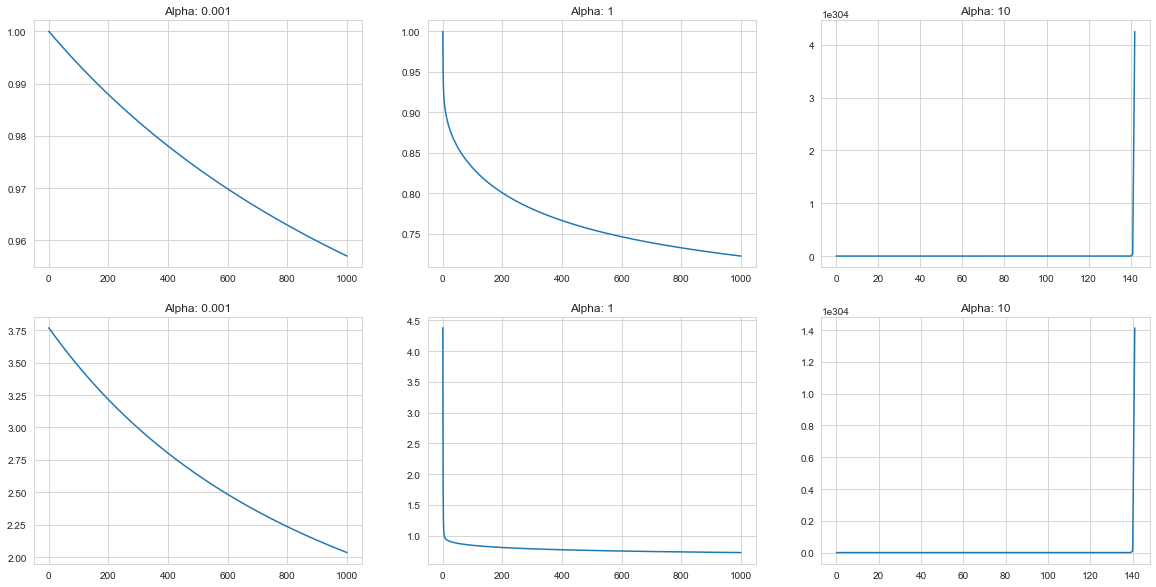

In [149]:
fig = plt.figure(figsize=(20, 10))

#Нулевые значения весов:
for i,a in enumerate([0.001, 1, 10]):
    wz1, mspe1 = grad_descent(X=X_train[:1000], y=y_train[:1000], w0=np.zeros((X_train.shape[1])), step_size=a, max_iter=1000, eps=0.0001, is_reg=False)
    plt.subplot(2, 3, i+1)
    plt.title('Alpha: '+ str(a))
    plt.plot(mspe1)
    
#Случайные веса:
for i,a in enumerate([0.001, 1, 10]):
    wr1, msper1 = grad_descent(X=X_train[:1000], y=y_train[:1000], w0=np.random.rand(X_train.shape[1]), step_size=a, max_iter=1000, eps=0.0001, is_reg=False)   
    plt.subplot(2, 3, i+4)
    plt.title('Alpha: '+ str(a))
    plt.plot(msper1)

**22. (0.5 балла)** Обучите линейную регрессию с функционалом MSPE и его регуляризованным вариантом на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации. Исследуйте зависимость скорости сходимости от наличия регуляризации. Обоснуйте, почему так происходит.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in multiply
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in multiply
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in multiply
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in multiply
  """


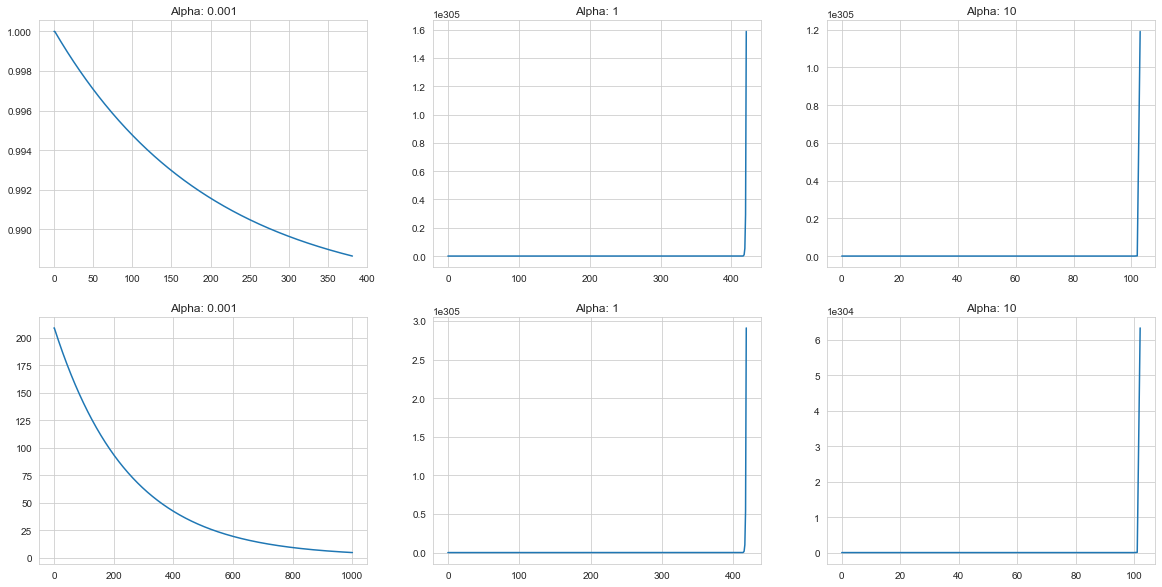

In [150]:
fig = plt.figure(figsize=(20, 10))

#Нулевые значения весов:
for i,a in enumerate([0.001, 1, 10]):
    wz2, mspez2 = grad_descent(X=X_train[:1000], y=y_train[:1000], w0=np.zeros((X_train.shape[1])), step_size=a, max_iter=1000, eps=0.0001, is_reg=True)
    plt.subplot(2, 3, i+1)
    plt.title('Alpha: '+ str(a))
    plt.plot(mspez2)
    
#Случайные веса:
for i,a in enumerate([0.001, 1, 10]):
    wr2, msper2 = grad_descent(X=X_train[:1000], y=y_train[:1000], w0=np.random.rand(X_train.shape[1]), step_size=a, max_iter=1000, eps=0.0001, is_reg=True)
    plt.subplot(2, 3, i+4)
    plt.title('Alpha: '+ str(a))
    plt.plot(msper2)

Метод градиентного спуска может быть весьма трудозатратен в случае большого размера обучающей выборки. Поэтому часто используют метод стохастического градиентного спуска, где на каждой итерации выбирается случайный объект из обучающей выборки и обновление весов происходит только по этому объекту. 

**23. (1 доп. балл)**  Реализуйте метод стохастического градиентного спуска (SGD) для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна иметь параметры и возвращаемое значение, аналогичные оным функции grad\_descent из п.21. Кроме того, должен использоваться аналогичный критерий останова.

In [151]:
def SGD(X, y, w0, step_size, max_iter, eps, is_reg):
    wpr = w0
    wtek = wpr
    X0 = X.iloc[0].values.reshape(1, -1)
    y0 = np.asarray(y.iloc[0]).reshape(1, -1)[0,:] 
    List = [get_reg_func(wpr, X0, y0)] if is_reg else [get_func(wpr, X0, y0)]
    
    for i in range(max_iter):
        ind = np.random.randint(0, high=X.shape[0], size=1)[0]
        X1 = X.iloc[ind].values.reshape(1, -1)
        y1 = np.asarray(y.iloc[ind]).reshape(1, -1)[0,:] 
        if is_reg == True:
            mspe_L = get_reg_func(wpr, X1, y1)
            List.append(mspe_L)
            grad = get_reg_grad(wpr, X1, y1)
        else:
            mspe = get_func(wpr, X1, y1)
            List.append(mspe)
            grad = get_grad(wpr, X1, y1)
        wtek = wpr - (step_size * grad)
        if np.linalg.norm(wtek - wpr) < eps:
            break
        wpr = wtek
    return wtek, List


Обучите линейную регрессию с функционалом $MSPE$ и его регуляризованным вариантом на обучающей выборке при помощи метода стохастического градиентного спуска, подобрав при этом размер шага, при котором метод будет сходиться. Нарисуйте график сходимости. Выведите значения $MSPE, MSE, R^2$ на контрольной выборке.

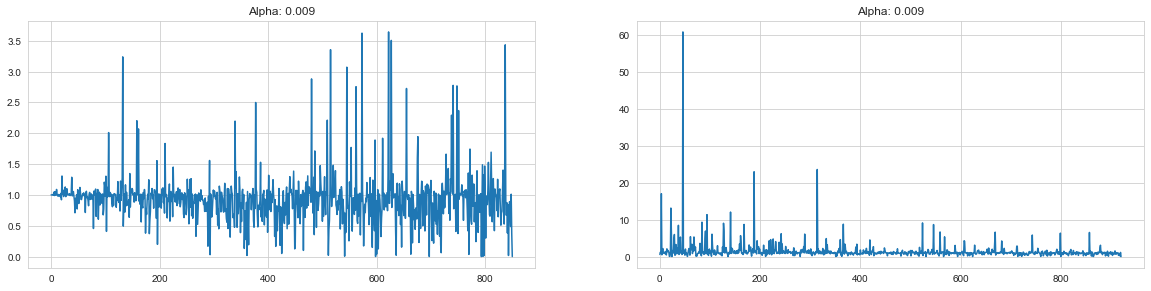

In [152]:
fig = plt.figure(figsize=(20, 10))

#Без регуляризации

#Нулевые значения весов:
wz3, mspe3 = SGD(X_train, y_train, w0=np.zeros((X_train.shape[1])), step_size=0.009, max_iter=1000, eps=0.0001, is_reg=False)
plt.subplot(2, 2, 1)
plt.title('Alpha: 0.009')
plt.plot(mspe3)

#Случайные веса:
wr3, msper3 = SGD(X_train, y_train, w0=np.random.rand(X_train.shape[1]), step_size=0.009, max_iter=1000, eps=0.0001, is_reg=False)   
plt.subplot(2, 2, 2)
plt.title('Alpha: 0.009')
plt.plot(msper3)

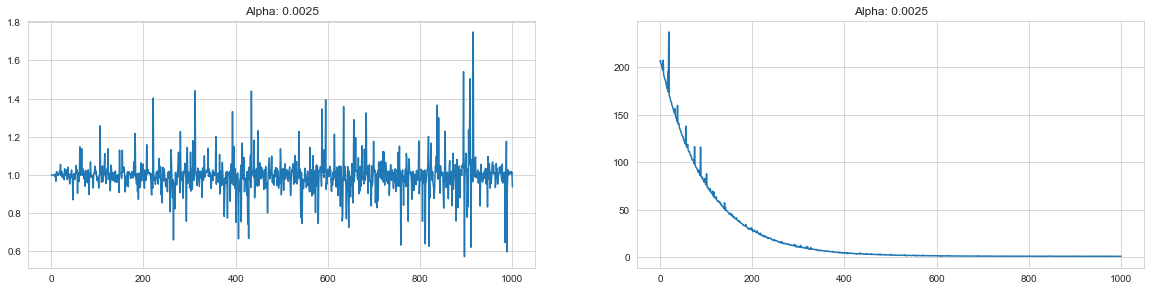

In [153]:
fig = plt.figure(figsize=(20, 10))

#С регуляризацией

#Нулевые значения весов:
wz4, mspe4 = SGD(X_train, y_train, w0=np.zeros((X_train.shape[1])), step_size=0.0025, max_iter=1000, eps=0.0001, is_reg=True)
plt.subplot(2, 2, 1)
plt.title('Alpha: 0.0025')
plt.plot(mspe4)

#Случайные веса:
wr4, msper4 = SGD(X_train, y_train, w0=np.random.rand(X_train.shape[1]), step_size=0.0025, max_iter=1000, eps=0.0001, is_reg=True)   
plt.subplot(2, 2, 2)
plt.title('Alpha: 0.0025')
plt.plot(msper4)

In [154]:
SGD1_noReg = make_pred(X_test, wz3)
print('No Reg','\n','MSPE: ', get_func(wz3, X_test, y_test),'\n','MSE: ', mean_squared_error(y_test, SGD1_noReg),'\n','𝑅2: ', r2_score(y_test, SGD1_noReg),'\n')
SGD2_noReg = make_pred(X_test, wr3)
print('No Reg','\n','MSPE: ', get_func(wr3, X_test, y_test),'\n','MSE: ', mean_squared_error(y_test, SGD2_noReg),'\n','𝑅2: ', r2_score(y_test, SGD2_noReg),'\n')
SGD3_Reg = make_pred(X_test, wz4)
print('Reg','\n','MSPE: ', get_func(wz4, X_test, y_test),'\n','MSE: ', mean_squared_error(y_test, SGD4_Reg),'\n','𝑅2: ',  r2_score(y_test, SGD3_Reg),'\n')
SGD4_Reg = make_pred(X_test, wr4)
print('Reg','\n','MSPE: ', get_func(wr4, X_test, y_test),'\n','MSE: ', mean_squared_error(y_test, SGD4_Reg),'\n','𝑅2: ',  r2_score(y_test, SGD4_Reg),'\n')

No Reg 
 MSPE:  0.9298257486173638 
 MSE:  1465.7308143318025 
 𝑅2:  -0.09573508422029042 

No Reg 
 MSPE:  1.0216442042593044 
 MSE:  1460.2917738731794 
 𝑅2:  -0.09166902557109435 

Reg 
 MSPE:  0.9764461153965954 
 MSE:  1457.0981968324502 
 𝑅2:  -0.08752798623239522 

Reg 
 MSPE:  0.9735434467270971 
 MSE:  1455.3333889125515 
 𝑅2:  -0.08796229012601398 



**24. (0.5 доп. балла)** Аналогично п.22 исследуйте зависимость скорости сходимости метода SGD от наличия регуляризации. Обоснуйте, почему так происходит.

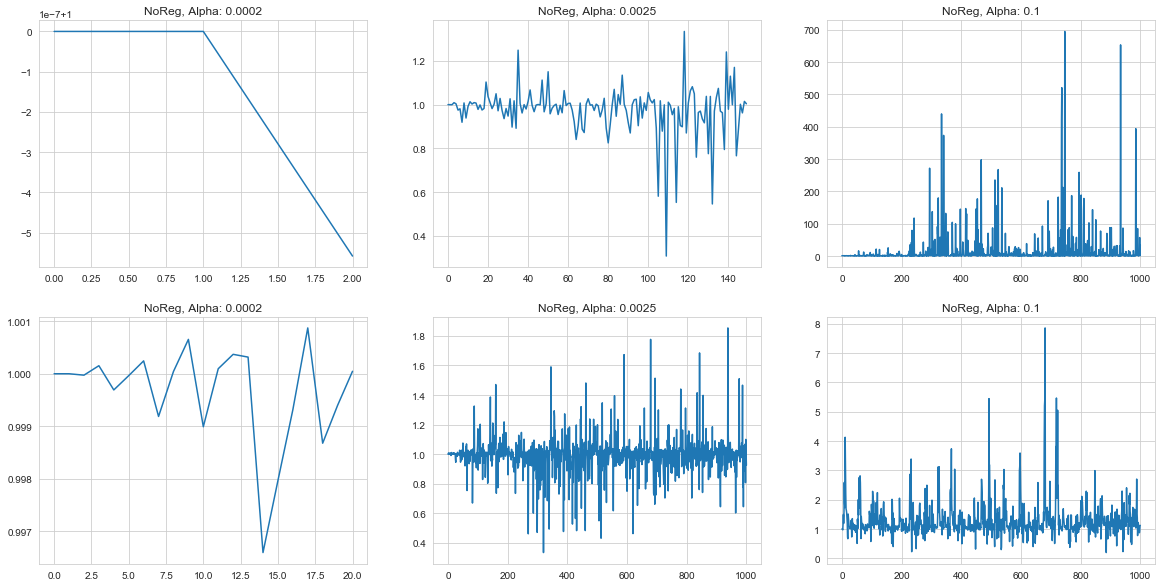

In [155]:
fig = plt.figure(figsize=(20, 10))
 #Нулевые значения весов без регуляризации:
for i, a in enumerate([0.0002, 0.0025, 0.1]):
    wz6, mspez6 = SGD(X=X_train, y=y_train, w0=np.zeros((X_train.shape[1])), step_size=a, max_iter=1000, eps=0.0001, is_reg=False)
    plt.subplot(2, 3, i+1)
    plt.title('NoReg, Alpha: ' + str(a))
    plt.plot(mspez6)
    
#Нулевые значения весов c регуляризацией:
for i, a in enumerate([0.0002, 0.0025, 0.1]):
    wz5, mspez5 = SGD(X=X_train, y=y_train, w0=np.zeros((X_train.shape[1])), step_size=a, max_iter=1000, eps=0.0001, is_reg=True)
    plt.subplot(2, 3, i+4)
    plt.title('NoReg, Alpha: ' + str(a))
    plt.plot(mspez5)

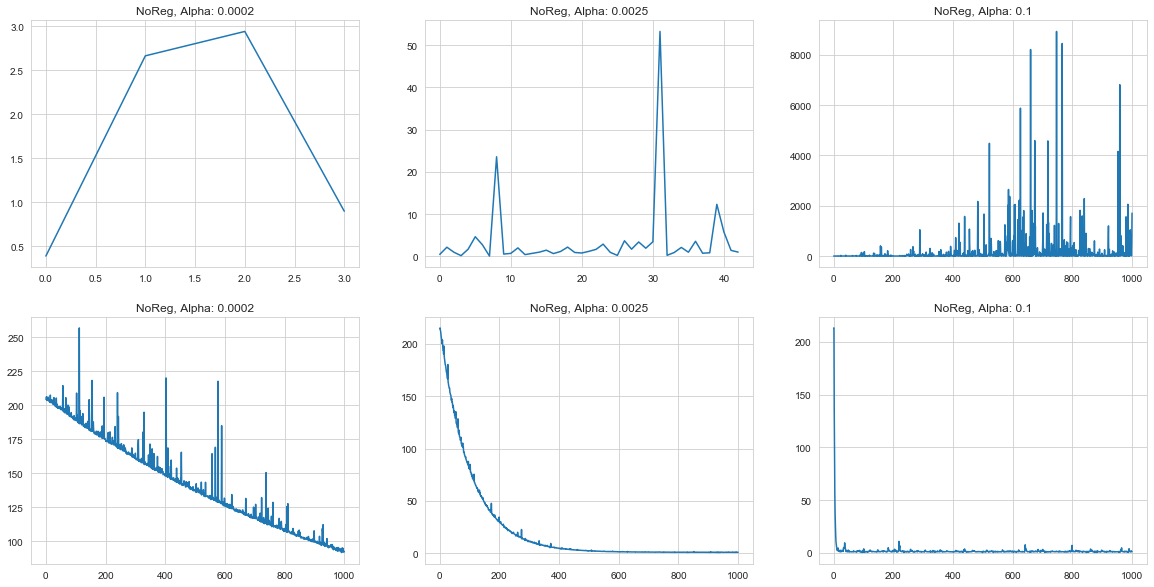

In [156]:
fig = plt.figure(figsize=(20, 10))
#Случайные веса без регуляризации:
for i, a in enumerate([0.0002, 0.0025, 0.1]):
    wr6, msper6 = SGD(X=X_train, y=y_train, w0=np.random.rand(X_train.shape[1]), step_size=a, max_iter=1000, eps=0.0001, is_reg=False)
    plt.subplot(2, 3, i+1)
    plt.title('NoReg, Alpha: '+ str(a))
    plt.plot(msper6)
    
#Случайные веса c регуляризацией:
for i, a in enumerate([0.0002, 0.0025, 0.1]):    
    wr5, msper5 = SGD(X=X_train, y=y_train, w0=np.random.rand(X_train.shape[1]), step_size=a, max_iter=1000, eps=0.0001, is_reg=True)
    plt.subplot(2, 3, i+4)
    plt.title('NoReg, Alpha: '+ str(a))
    plt.plot(msper5)

**25. (0.5 балла)** Обучите стандартную линейную регрессию с функционалом качества MSE на обучающей выборке и выведите значение MSPE полученного решения на контрольной выборке. Как оно соотносится с аналогичным результатом для решения, полученного в п.22? Почему?

In [157]:
lr_st = LinearRegression()
lr_st.fit(X_train, y_train)
w_lr_st = lr_st.coef_
lr_test = lr_st.predict(X_test)

In [158]:
print('MSPE: ', get_func(w_lr_st, X_test, y_test),'\n','MSE: ', mean_squared_error(y_test, lr_test),'\n','𝑅2: ', r2_score(y_test, lr_test))

MSPE:  11.672622174916645 
 MSE:  1194.3129780740658 
 𝑅2:  0.107168506782086


In [159]:
print('No Reg','\n','MSPE: ', get_func(wz3, X_test, y_test),'\n','MSE: ', mean_squared_error(y_test, SGD1_noReg),'\n','𝑅2: ', r2_score(y_test, SGD1_noReg),'\n')
print('No Reg','\n','MSPE: ', get_func(wr3, X_test, y_test),'\n','MSE: ', mean_squared_error(y_test, SGD2_noReg),'\n','𝑅2: ', r2_score(y_test, SGD2_noReg),'\n')
print('Reg','\n','MSPE: ', get_func(wz4, X_test, y_test),'\n','MSE: ', mean_squared_error(y_test, SGD4_Reg),'\n','𝑅2: ',  r2_score(y_test, SGD3_Reg),'\n')
print('Reg','\n','MSPE: ', get_func(wr4, X_test, y_test),'\n','MSE: ', mean_squared_error(y_test, SGD4_Reg),'\n','𝑅2: ',  r2_score(y_test, SGD4_Reg),'\n')

No Reg 
 MSPE:  0.9298257486173638 
 MSE:  1465.7308143318025 
 𝑅2:  -0.09573508422029042 

No Reg 
 MSPE:  1.0216442042593044 
 MSE:  1460.2917738731794 
 𝑅2:  -0.09166902557109435 

Reg 
 MSPE:  0.9764461153965954 
 MSE:  1455.3333889125515 
 𝑅2:  -0.08752798623239522 

Reg 
 MSPE:  0.9735434467270971 
 MSE:  1455.3333889125515 
 𝑅2:  -0.08796229012601398 

